##### In this notebook, i will be finding the most common topics that users discussed. It will be a great proxy to see the most popular topics on stackoverflow. I will also try to find the number of users from different countries.

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user_df = pd.read_csv('user-details.csv')
user_df.head(5)

,location,topics
0,"Reading, United Kingdom","['c#', 'java', '.net', 'linq', 'string', 'gene..."
1,"New York, United States","['sql', 'sql-server', 'mysql', 'oracle', 'post..."
2,France,"['git', 'github', 'eclipse', 'docker', 'versio..."
3,"Willemstad, Curaçao","['java', 'jsf', 'jsf-2', 'servlets', 'jsp', 'h..."
4,"Sofia, Bulgaria","['c#', 'asp.net-mvc', 'asp.net-mvc-3', 'jquery..."


In [33]:
user_df['topics'][0].split(",")[0].strip("[''")

'c#'

In [37]:
topics_list = []
def to_list(value):
    
    helper_list=[]
    helper_list = value.split(',')
    for index in range(len(helper_list)):
        topics_list.append(helper_list[index].strip("[''"))

user_df['topics'].apply(to_list)
print(len(topics_list))

19439


In [60]:
topic_series = pd.Series(data=topics_list)

In [65]:
topic_series = topic_series.apply(lambda x : x.strip(" ]']"))

In [75]:
pd.set_option('display.max_rows',100)
cot = topic_series.value_counts()

In [140]:
top = cot[0:10]

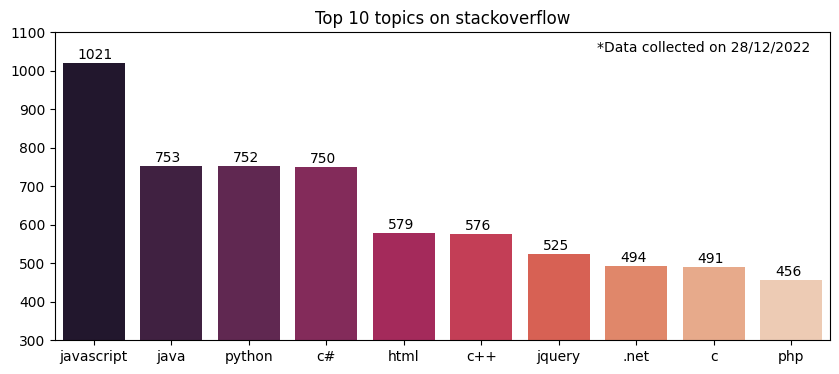

In [149]:
plt.figure(figsize=(10,4))
sns.barplot(x=top.keys(), y=top.values,palette="rocket")
plt.ylim([300,1100])
plt.title("Top 10 topics on stackoverflow")
plt.text(x=6.5,y=1050,s='*Data collected on 28/12/2022')
for i in range(len(top)):
    plt.text(x=i-0.21,y=top[i]+10,s=f'{top[i]}')
plt.show()

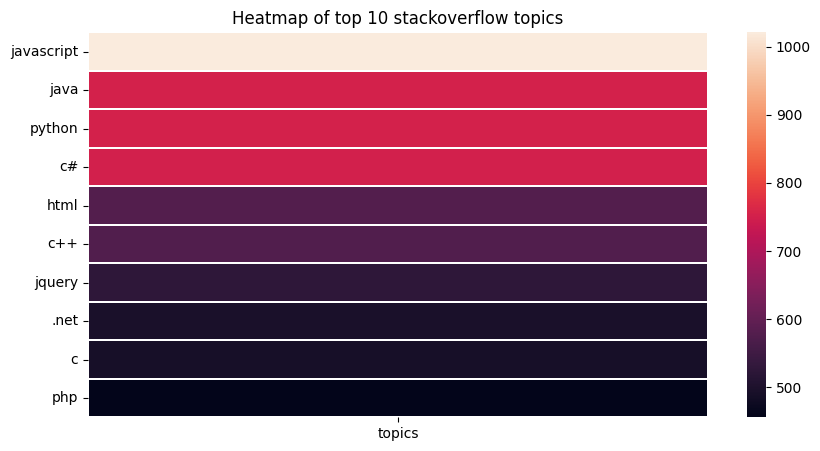

In [182]:
top_10 = pd.DataFrame(data=top,columns=['topics'])

plt.figure(figsize=(10,5))
sns.heatmap(top_10, linewidths=.2)
plt.title("Heatmap of top 10 stackoverflow topics")
plt.show()

In [190]:
location_series = pd.Series(data=user_df.location)

In [192]:
location_series.dropna(inplace=True)

In [229]:
location_list = []
def location_split(value):
    a = value.split(',')
    location_list.append(a[len(a)-1])

location_series.apply(location_split)
dummy_string = ','.join(location_list)

In [243]:
dummy_string = dummy_string.replace('USA','United States')
dummy_string = dummy_string.replace('NY','United States')
dummy_string = dummy_string.replace('CA','United States')
dummy_string = dummy_string.replace('WA','United States')
dummy_string = dummy_string.replace('California','United States')
dummy_string = dummy_string.replace('NC','United States')
dummy_string = dummy_string.replace('MA','United States')
dummy_string = dummy_string.replace('Massachusetts','United States')
dummy_string = dummy_string.replace('TX','United States')
dummy_string = dummy_string.replace('San Francisco Bay Area','United States')
dummy_string = dummy_string.replace('DC','United States')
dummy_string = dummy_string.replace('Bangaluru','India')
dummy_string = dummy_string.replace('UK','United Kingdom')
dummy_string = dummy_string.replace('Deutschland','Germany')
dummy_string = dummy_string.replace('Ohio','United States')
dummy_string = dummy_string.replace(' United States','United States')
dummy_string = dummy_string.replace(' United Kingdom','United Kingdom')
dummy_string = dummy_string.replace(' India','India')
dummy_string = dummy_string.replace(' Canada','Canada')
dummy_string = dummy_string.replace(' Australia','Australia')
dummy_string = dummy_string.replace(' France','France')
dummy_string = dummy_string.replace(' Switzerland','Switzerland')


In [244]:
cleaned_list = dummy_string.split(',')

In [245]:
helper_series = pd.Series(cleaned_list)
loc = helper_series.value_counts()

In [247]:
top_loc = loc[0:10]

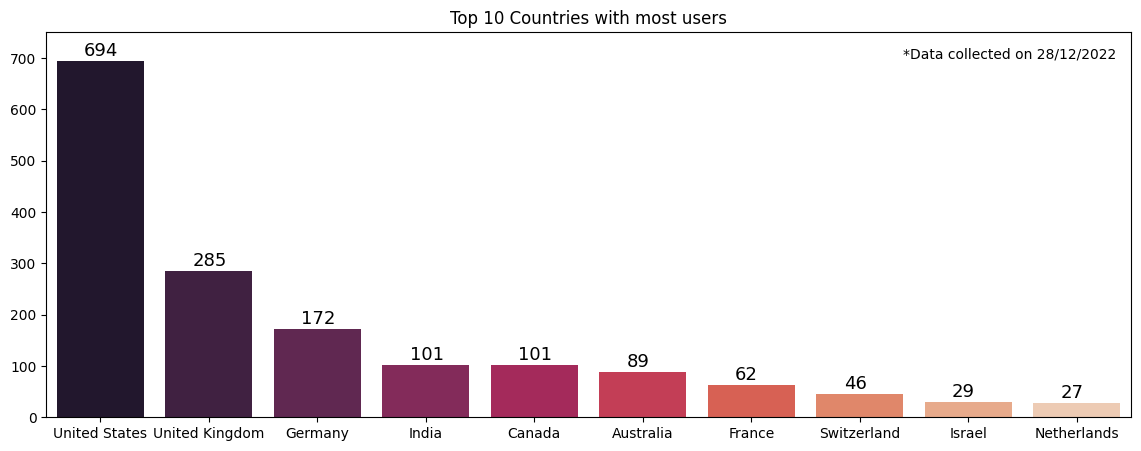

In [272]:
plt.figure(figsize=(14,5))
sns.barplot(x=top_loc.keys(), y=top_loc.values,palette="rocket")
plt.ylim([0,750])
plt.title("Top 10 Countries with most users")
plt.text(x=7.4,y=700,s='*Data collected on 28/12/2022')
for i in range(len(top_loc)):
    plt.text(x=i-0.15,y=top_loc[i]+10,s=f'{top_loc[i]}',fontsize=13)
plt.show()